### Ball Analysis: To determine the pos idx when the ball is hitted

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the pickle file
with open("../tracker_stubs/ball_detections.pkl", "rb") as f:
    ball_positions = pickle.load(f)

In [3]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [4]:
df_ball_positions

,x1,y1,x2,y2
0,633.580688,787.154846,652.099854,806.338623
1,633.580688,787.154846,652.099854,806.338623
2,874.571960,638.430359,895.218201,658.432617
3,862.074829,645.786469,883.590820,667.287781
4,849.577698,653.142578,871.963440,676.142944
...,...,...,...,...
209,1185.041382,250.008041,1198.064209,266.198853
210,1232.925293,740.850037,1245.655151,754.751770
211,1184.459595,227.321365,1196.036255,242.260300
212,1232.443115,740.614014,1245.270752,754.773193


In [5]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

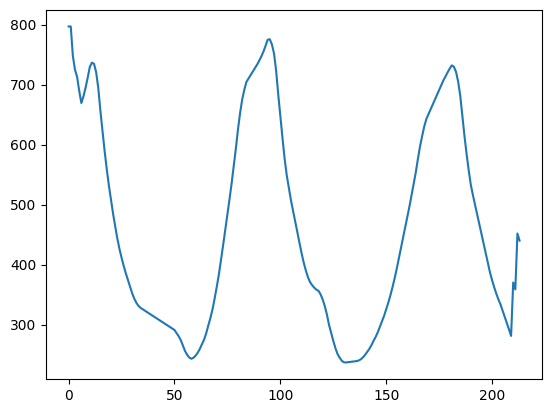

In [6]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [7]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

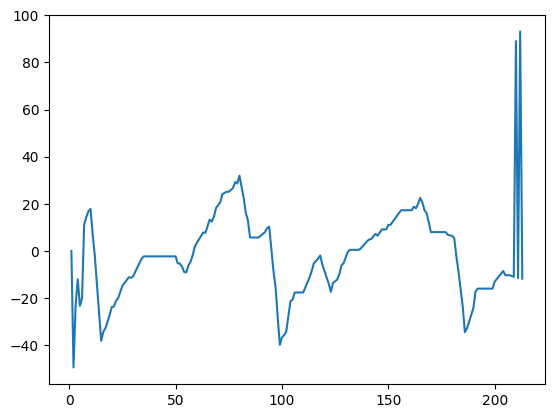

In [8]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [9]:
df_ball_positions['ball_hit'] = 0

In [ ]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [11]:
df_ball_positions[df_ball_positions['ball_hit']==1]


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,775.494873,717.041138,801.323364,746.351929,731.696533,736.486044,7.143884,1
58,926.159070,242.200214,937.918250,254.384033,248.292123,242.997332,-1.912753,1
95,623.087585,747.165405,643.840027,770.005737,758.585571,775.529901,0.935370,1
131,714.368585,230.569097,729.200962,244.896693,237.732895,236.806351,-0.313290,1
181,1281.343872,731.976440,1300.835693,751.363586,741.670013,731.933640,5.396043,1
